## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  63.921900  1186.388610  0.686318   2.162475  1.337316
1  10.449667   599.225012  0.299838  10.574172  1.471717
2  83.081114   414.098280  0.668658   4.404324  1.376852
3  22.912037  1680.234437  0.360579   9.452941  1.497907
4  37.139583  1186.618166  0.532566   4.698633  1.464167


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.05112 | train_mse: 5.31096 | train_mae: 1.77958 |  0:00:00s
epoch 1  | loss: 0.6126  | train_mse: 3.36685 | train_mae: 1.42136 |  0:00:00s


epoch 2  | loss: 0.41179 | train_mse: 2.90104 | train_mae: 1.17071 |  0:00:00s
epoch 3  | loss: 0.40971 | train_mse: 2.32646 | train_mae: 1.04028 |  0:00:00s


epoch 4  | loss: 0.45682 | train_mse: 0.82294 | train_mae: 0.64271 |  0:00:00s
epoch 5  | loss: 0.46349 | train_mse: 0.35319 | train_mae: 0.45091 |  0:00:00s
epoch 6  | loss: 0.42303 | train_mse: 0.50396 | train_mae: 0.52582 |  0:00:00s


epoch 7  | loss: 0.27875 | train_mse: 0.69474 | train_mae: 0.61213 |  0:00:01s
epoch 8  | loss: 0.32355 | train_mse: 0.54564 | train_mae: 0.54516 |  0:00:01s
epoch 9  | loss: 0.29017 | train_mse: 0.4066  | train_mae: 0.47572 |  0:00:01s


epoch 10 | loss: 0.38456 | train_mse: 0.45627 | train_mae: 0.50204 |  0:00:01s
epoch 11 | loss: 0.23471 | train_mse: 0.36034 | train_mae: 0.4576  |  0:00:01s
epoch 12 | loss: 0.22393 | train_mse: 0.3355  | train_mae: 0.45683 |  0:00:01s


epoch 13 | loss: 0.19132 | train_mse: 0.40265 | train_mae: 0.43364 |  0:00:01s
epoch 14 | loss: 0.2958  | train_mse: 0.3203  | train_mae: 0.40871 |  0:00:01s
epoch 15 | loss: 0.19346 | train_mse: 0.23717 | train_mae: 0.35241 |  0:00:01s


epoch 16 | loss: 0.16711 | train_mse: 0.25924 | train_mae: 0.38162 |  0:00:01s
epoch 17 | loss: 0.30703 | train_mse: 0.35375 | train_mae: 0.42281 |  0:00:01s
epoch 18 | loss: 0.44301 | train_mse: 0.25898 | train_mae: 0.35526 |  0:00:02s


epoch 19 | loss: 0.35598 | train_mse: 0.21461 | train_mae: 0.32636 |  0:00:02s
epoch 20 | loss: 0.22383 | train_mse: 0.25004 | train_mae: 0.37271 |  0:00:02s
epoch 21 | loss: 0.18841 | train_mse: 0.37841 | train_mae: 0.45349 |  0:00:02s


epoch 22 | loss: 0.24749 | train_mse: 0.4745  | train_mae: 0.48637 |  0:00:02s
epoch 23 | loss: 0.20081 | train_mse: 0.33253 | train_mae: 0.4059  |  0:00:02s
epoch 24 | loss: 0.25142 | train_mse: 0.19302 | train_mae: 0.31207 |  0:00:02s


epoch 25 | loss: 0.23134 | train_mse: 0.16053 | train_mae: 0.2914  |  0:00:02s
epoch 26 | loss: 0.18882 | train_mse: 0.18574 | train_mae: 0.31752 |  0:00:02s
epoch 27 | loss: 0.22621 | train_mse: 0.31268 | train_mae: 0.37828 |  0:00:02s


epoch 28 | loss: 0.20855 | train_mse: 0.30298 | train_mae: 0.35355 |  0:00:02s
epoch 29 | loss: 0.11529 | train_mse: 0.19289 | train_mae: 0.29255 |  0:00:03s
epoch 30 | loss: 0.14726 | train_mse: 0.15086 | train_mae: 0.28099 |  0:00:03s


epoch 31 | loss: 0.15022 | train_mse: 0.14707 | train_mae: 0.29082 |  0:00:03s
epoch 32 | loss: 0.23369 | train_mse: 0.12551 | train_mae: 0.2767  |  0:00:03s
epoch 33 | loss: 0.15606 | train_mse: 0.14909 | train_mae: 0.28726 |  0:00:03s


epoch 34 | loss: 0.13157 | train_mse: 0.18755 | train_mae: 0.30666 |  0:00:03s
epoch 35 | loss: 0.18511 | train_mse: 0.23642 | train_mae: 0.31938 |  0:00:03s
epoch 36 | loss: 0.1364  | train_mse: 0.17412 | train_mae: 0.28059 |  0:00:03s


epoch 37 | loss: 0.15922 | train_mse: 0.11727 | train_mae: 0.25748 |  0:00:03s
epoch 38 | loss: 0.1315  | train_mse: 0.12351 | train_mae: 0.27339 |  0:00:03s
epoch 39 | loss: 0.11714 | train_mse: 0.12101 | train_mae: 0.27155 |  0:00:03s


epoch 40 | loss: 0.10824 | train_mse: 0.15082 | train_mae: 0.30005 |  0:00:03s
epoch 41 | loss: 0.2125  | train_mse: 0.16375 | train_mae: 0.29944 |  0:00:04s
epoch 42 | loss: 0.17648 | train_mse: 0.19922 | train_mae: 0.32186 |  0:00:04s


epoch 43 | loss: 0.12117 | train_mse: 0.17727 | train_mae: 0.30427 |  0:00:04s
epoch 44 | loss: 0.14166 | train_mse: 0.12383 | train_mae: 0.27019 |  0:00:04s
epoch 45 | loss: 0.1164  | train_mse: 0.12087 | train_mae: 0.26113 |  0:00:04s


epoch 46 | loss: 0.1188  | train_mse: 0.11892 | train_mae: 0.26632 |  0:00:04s
epoch 47 | loss: 0.16882 | train_mse: 0.10433 | train_mae: 0.25801 |  0:00:04s
epoch 48 | loss: 0.12671 | train_mse: 0.10173 | train_mae: 0.25679 |  0:00:04s


epoch 49 | loss: 0.12296 | train_mse: 0.09619 | train_mae: 0.24743 |  0:00:04s
epoch 50 | loss: 0.22779 | train_mse: 0.10866 | train_mae: 0.25576 |  0:00:04s
epoch 51 | loss: 0.18222 | train_mse: 0.12413 | train_mae: 0.26722 |  0:00:04s


epoch 52 | loss: 0.13759 | train_mse: 0.11243 | train_mae: 0.25492 |  0:00:04s
epoch 53 | loss: 0.20465 | train_mse: 0.11765 | train_mae: 0.25825 |  0:00:05s
epoch 54 | loss: 0.12045 | train_mse: 0.13645 | train_mae: 0.26863 |  0:00:05s


epoch 55 | loss: 0.08628 | train_mse: 0.1669  | train_mae: 0.29091 |  0:00:05s
epoch 56 | loss: 0.19902 | train_mse: 0.14144 | train_mae: 0.27124 |  0:00:05s
epoch 57 | loss: 0.09189 | train_mse: 0.11341 | train_mae: 0.24391 |  0:00:05s


epoch 58 | loss: 0.17125 | train_mse: 0.10744 | train_mae: 0.23994 |  0:00:05s
epoch 59 | loss: 0.30294 | train_mse: 0.09789 | train_mae: 0.23138 |  0:00:05s
epoch 60 | loss: 0.11596 | train_mse: 0.10684 | train_mae: 0.24177 |  0:00:05s


epoch 61 | loss: 0.1863  | train_mse: 0.12963 | train_mae: 0.25735 |  0:00:05s
epoch 62 | loss: 0.23015 | train_mse: 0.09784 | train_mae: 0.23873 |  0:00:05s
epoch 63 | loss: 0.16311 | train_mse: 0.09207 | train_mae: 0.23674 |  0:00:05s


epoch 64 | loss: 0.11149 | train_mse: 0.07828 | train_mae: 0.21801 |  0:00:05s
epoch 65 | loss: 0.12809 | train_mse: 0.08767 | train_mae: 0.22703 |  0:00:06s
epoch 66 | loss: 0.26649 | train_mse: 0.09423 | train_mae: 0.22741 |  0:00:06s


epoch 67 | loss: 0.1195  | train_mse: 0.09457 | train_mae: 0.22646 |  0:00:06s
epoch 68 | loss: 0.18886 | train_mse: 0.09589 | train_mae: 0.23317 |  0:00:06s
epoch 69 | loss: 0.16852 | train_mse: 0.10489 | train_mae: 0.246   |  0:00:06s


epoch 70 | loss: 0.12376 | train_mse: 0.09286 | train_mae: 0.22981 |  0:00:06s
epoch 71 | loss: 0.09085 | train_mse: 0.10195 | train_mae: 0.23731 |  0:00:06s
epoch 72 | loss: 0.10191 | train_mse: 0.10158 | train_mae: 0.24076 |  0:00:06s


epoch 73 | loss: 0.13024 | train_mse: 0.0949  | train_mae: 0.24008 |  0:00:06s
epoch 74 | loss: 0.10382 | train_mse: 0.11406 | train_mae: 0.25665 |  0:00:06s
epoch 75 | loss: 0.16559 | train_mse: 0.15914 | train_mae: 0.28509 |  0:00:06s


epoch 76 | loss: 0.12884 | train_mse: 0.17094 | train_mae: 0.28855 |  0:00:06s
epoch 77 | loss: 0.14378 | train_mse: 0.18035 | train_mae: 0.29048 |  0:00:07s
epoch 78 | loss: 0.10055 | train_mse: 0.21884 | train_mae: 0.31122 |  0:00:07s


epoch 79 | loss: 0.09318 | train_mse: 0.24024 | train_mae: 0.32087 |  0:00:07s
epoch 80 | loss: 0.2323  | train_mse: 0.20667 | train_mae: 0.29689 |  0:00:07s
epoch 81 | loss: 0.12252 | train_mse: 0.20583 | train_mae: 0.29991 |  0:00:07s


epoch 82 | loss: 0.16568 | train_mse: 0.18259 | train_mae: 0.29133 |  0:00:07s
epoch 83 | loss: 0.11074 | train_mse: 0.12477 | train_mae: 0.25825 |  0:00:07s
epoch 84 | loss: 0.15803 | train_mse: 0.09547 | train_mae: 0.23945 |  0:00:07s


epoch 85 | loss: 0.11875 | train_mse: 0.10512 | train_mae: 0.24533 |  0:00:07s
epoch 86 | loss: 0.12492 | train_mse: 0.1149  | train_mae: 0.24975 |  0:00:07s
epoch 87 | loss: 0.12156 | train_mse: 0.12694 | train_mae: 0.25832 |  0:00:07s


epoch 88 | loss: 0.29062 | train_mse: 0.15079 | train_mae: 0.2786  |  0:00:07s
epoch 89 | loss: 0.13016 | train_mse: 0.12967 | train_mae: 0.26471 |  0:00:07s
epoch 90 | loss: 0.11573 | train_mse: 0.14126 | train_mae: 0.27862 |  0:00:08s


epoch 91 | loss: 0.20138 | train_mse: 0.10733 | train_mae: 0.25047 |  0:00:08s
epoch 92 | loss: 0.11573 | train_mse: 0.08936 | train_mae: 0.23511 |  0:00:08s
epoch 93 | loss: 0.10157 | train_mse: 0.0841  | train_mae: 0.22903 |  0:00:08s


epoch 94 | loss: 0.10583 | train_mse: 0.09439 | train_mae: 0.24225 |  0:00:08s
epoch 95 | loss: 0.11789 | train_mse: 0.10809 | train_mae: 0.25195 |  0:00:08s
epoch 96 | loss: 0.16077 | train_mse: 0.07907 | train_mae: 0.22753 |  0:00:08s


epoch 97 | loss: 0.15179 | train_mse: 0.09858 | train_mae: 0.24254 |  0:00:08s
epoch 98 | loss: 0.12066 | train_mse: 0.1158  | train_mae: 0.24956 |  0:00:08s
epoch 99 | loss: 0.10572 | train_mse: 0.13506 | train_mae: 0.27052 |  0:00:08s


epoch 100| loss: 0.10736 | train_mse: 0.14545 | train_mae: 0.28633 |  0:00:08s
epoch 101| loss: 0.16662 | train_mse: 0.1554  | train_mae: 0.28471 |  0:00:08s
epoch 102| loss: 0.11072 | train_mse: 0.10513 | train_mae: 0.255   |  0:00:09s


epoch 103| loss: 0.18145 | train_mse: 0.06818 | train_mae: 0.21497 |  0:00:09s
epoch 104| loss: 0.15702 | train_mse: 0.05971 | train_mae: 0.20368 |  0:00:09s
epoch 105| loss: 0.10019 | train_mse: 0.05637 | train_mae: 0.19583 |  0:00:09s


epoch 106| loss: 0.15073 | train_mse: 0.05934 | train_mae: 0.2079  |  0:00:09s
epoch 107| loss: 0.09695 | train_mse: 0.06688 | train_mae: 0.22049 |  0:00:09s
epoch 108| loss: 0.14831 | train_mse: 0.06678 | train_mae: 0.21813 |  0:00:09s


epoch 109| loss: 0.20244 | train_mse: 0.06785 | train_mae: 0.21743 |  0:00:09s
epoch 110| loss: 0.08563 | train_mse: 0.0601  | train_mae: 0.20389 |  0:00:09s
epoch 111| loss: 0.13891 | train_mse: 0.06722 | train_mae: 0.21285 |  0:00:09s


epoch 112| loss: 0.1235  | train_mse: 0.09011 | train_mae: 0.23988 |  0:00:09s
epoch 113| loss: 0.12121 | train_mse: 0.14575 | train_mae: 0.28192 |  0:00:10s
epoch 114| loss: 0.18863 | train_mse: 0.13724 | train_mae: 0.27782 |  0:00:10s


epoch 115| loss: 0.1589  | train_mse: 0.06409 | train_mae: 0.20945 |  0:00:10s
epoch 116| loss: 0.12575 | train_mse: 0.0602  | train_mae: 0.20209 |  0:00:10s
epoch 117| loss: 0.09182 | train_mse: 0.06522 | train_mae: 0.20805 |  0:00:10s


epoch 118| loss: 0.16252 | train_mse: 0.05477 | train_mae: 0.19428 |  0:00:10s
epoch 119| loss: 0.1565  | train_mse: 0.06925 | train_mae: 0.21424 |  0:00:10s
epoch 120| loss: 0.11804 | train_mse: 0.07541 | train_mae: 0.21506 |  0:00:10s


epoch 121| loss: 0.14717 | train_mse: 0.05487 | train_mae: 0.18799 |  0:00:10s
epoch 122| loss: 0.11346 | train_mse: 0.06421 | train_mae: 0.20133 |  0:00:10s
epoch 123| loss: 0.24832 | train_mse: 0.06804 | train_mae: 0.20816 |  0:00:10s


epoch 124| loss: 0.13303 | train_mse: 0.07042 | train_mae: 0.21634 |  0:00:10s
epoch 125| loss: 0.11855 | train_mse: 0.077   | train_mae: 0.22026 |  0:00:11s
epoch 126| loss: 0.12684 | train_mse: 0.08963 | train_mae: 0.23319 |  0:00:11s


epoch 127| loss: 0.12129 | train_mse: 0.13651 | train_mae: 0.25549 |  0:00:11s
epoch 128| loss: 0.14818 | train_mse: 0.07233 | train_mae: 0.2019  |  0:00:11s
epoch 129| loss: 0.18053 | train_mse: 0.05769 | train_mae: 0.19551 |  0:00:11s


epoch 130| loss: 0.22745 | train_mse: 0.09567 | train_mae: 0.23938 |  0:00:11s
epoch 131| loss: 0.14724 | train_mse: 0.09324 | train_mae: 0.23465 |  0:00:11s
epoch 132| loss: 0.17059 | train_mse: 0.07533 | train_mae: 0.21633 |  0:00:11s


epoch 133| loss: 0.14503 | train_mse: 0.06542 | train_mae: 0.20377 |  0:00:11s
epoch 134| loss: 0.13221 | train_mse: 0.06398 | train_mae: 0.20508 |  0:00:11s
epoch 135| loss: 0.2058  | train_mse: 0.06403 | train_mae: 0.20159 |  0:00:11s


epoch 136| loss: 0.13596 | train_mse: 0.08355 | train_mae: 0.22425 |  0:00:11s
epoch 137| loss: 0.11474 | train_mse: 0.08621 | train_mae: 0.22705 |  0:00:12s
epoch 138| loss: 0.1121  | train_mse: 0.08969 | train_mae: 0.23113 |  0:00:12s


epoch 139| loss: 0.09878 | train_mse: 0.10706 | train_mae: 0.24586 |  0:00:12s
epoch 140| loss: 0.12116 | train_mse: 0.11594 | train_mae: 0.25521 |  0:00:12s
epoch 141| loss: 0.15356 | train_mse: 0.12758 | train_mae: 0.26558 |  0:00:12s


epoch 142| loss: 0.08797 | train_mse: 0.09987 | train_mae: 0.2441  |  0:00:12s
epoch 143| loss: 0.10734 | train_mse: 0.08082 | train_mae: 0.22411 |  0:00:12s
epoch 144| loss: 0.09167 | train_mse: 0.07646 | train_mae: 0.22159 |  0:00:12s


epoch 145| loss: 0.11478 | train_mse: 0.07434 | train_mae: 0.21674 |  0:00:12s
epoch 146| loss: 0.10508 | train_mse: 0.05865 | train_mae: 0.19887 |  0:00:12s
epoch 147| loss: 0.13346 | train_mse: 0.06001 | train_mae: 0.20073 |  0:00:12s


epoch 148| loss: 0.0671  | train_mse: 0.06793 | train_mae: 0.2092  |  0:00:12s
epoch 149| loss: 0.10628 | train_mse: 0.06287 | train_mae: 0.20815 |  0:00:13s
epoch 150| loss: 0.13686 | train_mse: 0.06116 | train_mae: 0.20574 |  0:00:13s


epoch 151| loss: 0.12565 | train_mse: 0.05605 | train_mae: 0.19624 |  0:00:13s
epoch 152| loss: 0.1112  | train_mse: 0.05264 | train_mae: 0.19336 |  0:00:13s
epoch 153| loss: 0.15256 | train_mse: 0.0804  | train_mae: 0.23153 |  0:00:13s


epoch 154| loss: 0.12678 | train_mse: 0.06882 | train_mae: 0.21871 |  0:00:13s
epoch 155| loss: 0.17355 | train_mse: 0.07798 | train_mae: 0.23007 |  0:00:13s
epoch 156| loss: 0.0678  | train_mse: 0.08715 | train_mae: 0.23736 |  0:00:13s


epoch 157| loss: 0.164   | train_mse: 0.07264 | train_mae: 0.21995 |  0:00:13s
epoch 158| loss: 0.11531 | train_mse: 0.06728 | train_mae: 0.2113  |  0:00:13s
epoch 159| loss: 0.13089 | train_mse: 0.0733  | train_mae: 0.22685 |  0:00:13s


epoch 160| loss: 0.15772 | train_mse: 0.06626 | train_mae: 0.21658 |  0:00:13s
epoch 161| loss: 0.11605 | train_mse: 0.05551 | train_mae: 0.19477 |  0:00:14s
epoch 162| loss: 0.11219 | train_mse: 0.06023 | train_mae: 0.20417 |  0:00:14s


epoch 163| loss: 0.10517 | train_mse: 0.06535 | train_mae: 0.20834 |  0:00:14s


epoch 164| loss: 0.07162 | train_mse: 0.05921 | train_mae: 0.19905 |  0:00:14s
epoch 165| loss: 0.07977 | train_mse: 0.05146 | train_mae: 0.18752 |  0:00:14s
epoch 166| loss: 0.11022 | train_mse: 0.05947 | train_mae: 0.20016 |  0:00:14s


epoch 167| loss: 0.25046 | train_mse: 0.06381 | train_mae: 0.20712 |  0:00:14s
epoch 168| loss: 0.11033 | train_mse: 0.07095 | train_mae: 0.21604 |  0:00:14s
epoch 169| loss: 0.05891 | train_mse: 0.08539 | train_mae: 0.23787 |  0:00:14s


epoch 170| loss: 0.06028 | train_mse: 0.09866 | train_mae: 0.25647 |  0:00:14s


epoch 171| loss: 0.17509 | train_mse: 0.10014 | train_mae: 0.25559 |  0:00:15s
epoch 172| loss: 0.09711 | train_mse: 0.07315 | train_mae: 0.21613 |  0:00:15s
epoch 173| loss: 0.09708 | train_mse: 0.05187 | train_mae: 0.1765  |  0:00:15s


epoch 174| loss: 0.08613 | train_mse: 0.04976 | train_mae: 0.17744 |  0:00:15s
epoch 175| loss: 0.08725 | train_mse: 0.06885 | train_mae: 0.20811 |  0:00:15s
epoch 176| loss: 0.07071 | train_mse: 0.0646  | train_mae: 0.1996  |  0:00:15s


epoch 177| loss: 0.07273 | train_mse: 0.04799 | train_mae: 0.17637 |  0:00:15s
epoch 178| loss: 0.07637 | train_mse: 0.05314 | train_mae: 0.18866 |  0:00:15s
epoch 179| loss: 0.07679 | train_mse: 0.05904 | train_mae: 0.20031 |  0:00:15s


epoch 180| loss: 0.17939 | train_mse: 0.0657  | train_mae: 0.19827 |  0:00:15s
epoch 181| loss: 0.07283 | train_mse: 0.0687  | train_mae: 0.20597 |  0:00:16s
epoch 182| loss: 0.13844 | train_mse: 0.05114 | train_mae: 0.18711 |  0:00:16s


epoch 183| loss: 0.11216 | train_mse: 0.05331 | train_mae: 0.1889  |  0:00:16s
epoch 184| loss: 0.14859 | train_mse: 0.07967 | train_mae: 0.21074 |  0:00:16s
epoch 185| loss: 0.11535 | train_mse: 0.07695 | train_mae: 0.20533 |  0:00:16s


epoch 186| loss: 0.06235 | train_mse: 0.05494 | train_mae: 0.1825  |  0:00:16s
epoch 187| loss: 0.1604  | train_mse: 0.04547 | train_mae: 0.17465 |  0:00:16s
epoch 188| loss: 0.08038 | train_mse: 0.06138 | train_mae: 0.20472 |  0:00:16s


epoch 189| loss: 0.06868 | train_mse: 0.05476 | train_mae: 0.19351 |  0:00:16s
epoch 190| loss: 0.07424 | train_mse: 0.04566 | train_mae: 0.16902 |  0:00:16s
epoch 191| loss: 0.09975 | train_mse: 0.0452  | train_mae: 0.17195 |  0:00:16s


epoch 192| loss: 0.12607 | train_mse: 0.0488  | train_mae: 0.18203 |  0:00:16s
epoch 193| loss: 0.16355 | train_mse: 0.04804 | train_mae: 0.17608 |  0:00:17s
epoch 194| loss: 0.1035  | train_mse: 0.05744 | train_mae: 0.18725 |  0:00:17s


epoch 195| loss: 0.07612 | train_mse: 0.06973 | train_mae: 0.19575 |  0:00:17s
epoch 196| loss: 0.1167  | train_mse: 0.06438 | train_mae: 0.1951  |  0:00:17s
epoch 197| loss: 0.09032 | train_mse: 0.059   | train_mae: 0.19231 |  0:00:17s


epoch 198| loss: 0.16572 | train_mse: 0.06566 | train_mae: 0.20891 |  0:00:17s
epoch 199| loss: 0.13094 | train_mse: 0.0835  | train_mae: 0.23437 |  0:00:17s
epoch 200| loss: 0.09285 | train_mse: 0.0775  | train_mae: 0.21918 |  0:00:17s


epoch 201| loss: 0.0972  | train_mse: 0.07028 | train_mae: 0.20541 |  0:00:17s
epoch 202| loss: 0.06821 | train_mse: 0.06343 | train_mae: 0.19762 |  0:00:17s
epoch 203| loss: 0.10795 | train_mse: 0.06518 | train_mae: 0.20103 |  0:00:17s


epoch 204| loss: 0.08234 | train_mse: 0.07276 | train_mae: 0.20912 |  0:00:18s
epoch 205| loss: 0.09431 | train_mse: 0.07701 | train_mae: 0.21265 |  0:00:18s
epoch 206| loss: 0.12681 | train_mse: 0.09764 | train_mae: 0.23421 |  0:00:18s


epoch 207| loss: 0.25674 | train_mse: 0.11231 | train_mae: 0.23512 |  0:00:18s
epoch 208| loss: 0.06386 | train_mse: 0.15806 | train_mae: 0.26391 |  0:00:18s
epoch 209| loss: 0.11548 | train_mse: 0.14425 | train_mae: 0.25445 |  0:00:18s


epoch 210| loss: 0.12984 | train_mse: 0.13037 | train_mae: 0.25299 |  0:00:18s
epoch 211| loss: 0.08248 | train_mse: 0.09394 | train_mae: 0.22571 |  0:00:18s
epoch 212| loss: 0.07834 | train_mse: 0.06257 | train_mae: 0.19966 |  0:00:18s


epoch 213| loss: 0.08388 | train_mse: 0.06359 | train_mae: 0.18883 |  0:00:18s
epoch 214| loss: 0.10968 | train_mse: 0.06455 | train_mae: 0.19547 |  0:00:18s
epoch 215| loss: 0.07024 | train_mse: 0.06682 | train_mae: 0.20384 |  0:00:18s


epoch 216| loss: 0.1001  | train_mse: 0.07079 | train_mae: 0.20866 |  0:00:19s
epoch 217| loss: 0.10571 | train_mse: 0.07293 | train_mae: 0.21042 |  0:00:19s
epoch 218| loss: 0.11755 | train_mse: 0.06994 | train_mae: 0.21108 |  0:00:19s


epoch 219| loss: 0.07122 | train_mse: 0.07597 | train_mae: 0.22064 |  0:00:19s
epoch 220| loss: 0.08273 | train_mse: 0.07391 | train_mae: 0.21705 |  0:00:19s
epoch 221| loss: 0.09889 | train_mse: 0.07028 | train_mae: 0.21379 |  0:00:19s


epoch 222| loss: 0.11512 | train_mse: 0.07595 | train_mae: 0.21977 |  0:00:19s
epoch 223| loss: 0.19946 | train_mse: 0.10009 | train_mae: 0.24766 |  0:00:19s
epoch 224| loss: 0.18261 | train_mse: 0.07871 | train_mae: 0.22298 |  0:00:19s


epoch 225| loss: 0.07461 | train_mse: 0.05497 | train_mae: 0.19048 |  0:00:19s
epoch 226| loss: 0.13031 | train_mse: 0.05361 | train_mae: 0.18324 |  0:00:19s
epoch 227| loss: 0.09236 | train_mse: 0.05625 | train_mae: 0.18441 |  0:00:19s


epoch 228| loss: 0.13679 | train_mse: 0.05098 | train_mae: 0.18046 |  0:00:20s
epoch 229| loss: 0.10102 | train_mse: 0.0587  | train_mae: 0.19445 |  0:00:20s
epoch 230| loss: 0.11124 | train_mse: 0.05845 | train_mae: 0.20174 |  0:00:20s


epoch 231| loss: 0.07401 | train_mse: 0.06771 | train_mae: 0.21799 |  0:00:20s
epoch 232| loss: 0.10397 | train_mse: 0.10134 | train_mae: 0.25109 |  0:00:20s
epoch 233| loss: 0.0895  | train_mse: 0.09932 | train_mae: 0.23607 |  0:00:20s


epoch 234| loss: 0.08529 | train_mse: 0.08659 | train_mae: 0.22516 |  0:00:20s
epoch 235| loss: 0.07559 | train_mse: 0.08128 | train_mae: 0.2316  |  0:00:20s
epoch 236| loss: 0.07522 | train_mse: 0.09927 | train_mae: 0.25816 |  0:00:20s


epoch 237| loss: 0.1059  | train_mse: 0.19426 | train_mae: 0.3139  |  0:00:20s
epoch 238| loss: 0.16916 | train_mse: 0.16417 | train_mae: 0.3041  |  0:00:20s
epoch 239| loss: 0.10727 | train_mse: 0.19874 | train_mae: 0.3086  |  0:00:20s


epoch 240| loss: 0.08255 | train_mse: 0.19951 | train_mae: 0.29617 |  0:00:21s

Early stopping occurred at epoch 240 with best_epoch = 190 and best_train_mae = 0.16902
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

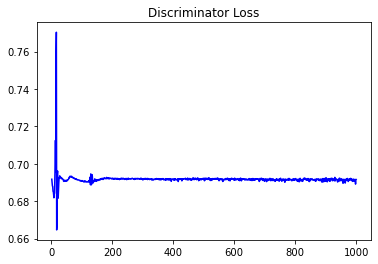

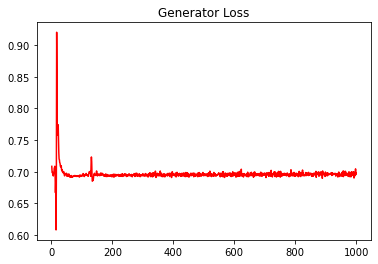

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.28744627359350516


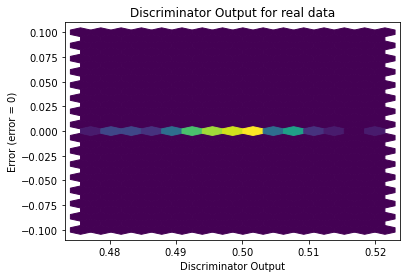

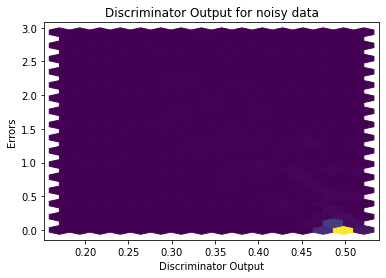

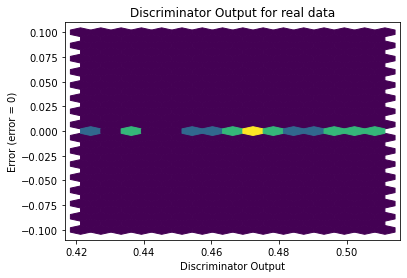

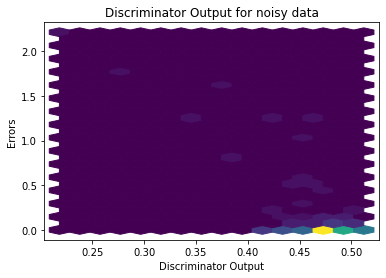

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


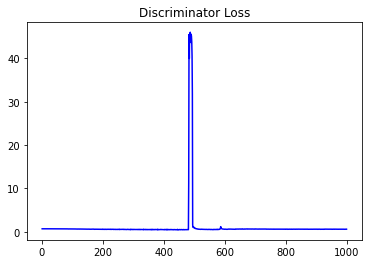

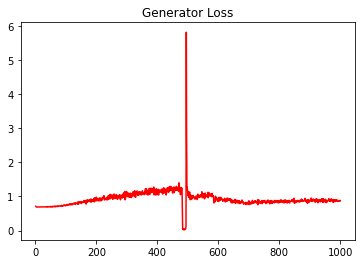

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3584347660434502


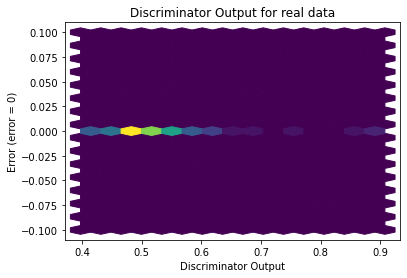

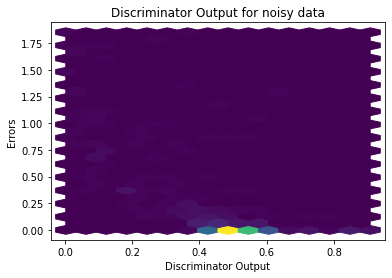

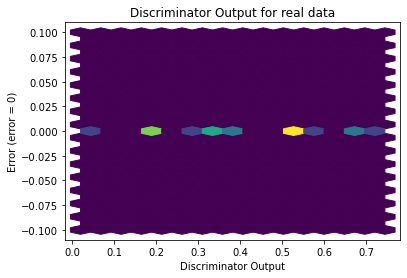

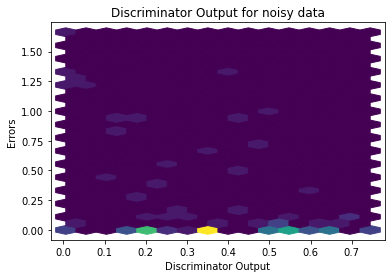

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0631]], requires_grad=True)
